In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
df = pd.read_excel("listings (NYC).xlsx")

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City Name
0,23669201,https://www.airbnb.com/rooms/23669201,20200000000000,2020-09-08,Great Price: Williamsburg Brooklyn Loft off L ...,"1,100 sq. ft Loft between Williamsburg and Bu...",Old Italian neighborhood that is now gentrifie...,https://a0.muscache.com/pictures/44ffd47c-68a8...,2438,https://www.airbnb.com/users/show/2438,...,NaN,NaN,NaN,f,1,1,0,0,0.03,NYC
1,1101224,https://www.airbnb.com/rooms/1101224,20200000000000,2020-09-08,THE PUTNAM-3 Bdrm w/Outdoor Zen space/washer&d...,"<b>The space</b><br />B/c of current events, w...",NaN,https://a0.muscache.com/pictures/bad8a25b-57a9...,2571,https://www.airbnb.com/users/show/2571,...,9.0,10.0,NaN,f,1,1,0,0,0.37,NYC
2,7937553,https://www.airbnb.com/rooms/7937553,20200000000000,2020-09-09,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,The Riomaggione Room features and amenities:<...,"The neighborhood is a quiet, tree lined reside...",https://a0.muscache.com/pictures/1d4a5019-6fea...,2787,https://www.airbnb.com/users/show/2787,...,10.0,10.0,NaN,f,7,1,4,2,0.47,NYC
3,10160215,https://www.airbnb.com/rooms/10160215,20200000000000,2020-09-09,Torre del Lago Room.,The Torre de Lago Room features and amenities...,"We live on a quiet, treelined street. Restaur...",https://a0.muscache.com/pictures/109e6454-e022...,2787,https://www.airbnb.com/users/show/2787,...,9.0,10.0,NaN,f,7,1,4,2,0.40,NYC
4,10267034,https://www.airbnb.com/rooms/10267034,20200000000000,2020-09-09,"Vernazza Rm. Clean, quiet and available tonight.",The Vernazza room features and amenities:<br /...,"Quiet tree lined, residential area",https://a0.muscache.com/pictures/c7189e9b-71ae...,2787,https://www.airbnb.com/users/show/2787,...,10.0,9.0,NaN,f,7,1,4,2,0.15,NYC


In [5]:
for col in df.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_sc

In [6]:
df_price =  df[["latitude", "longitude", "price"]]
df_price.head()

,latitude,longitude,price
0,40.71412,-73.94447,$120.00
1,40.68674,-73.93845,$111.00
2,40.60951,-73.97622,$84.00
3,40.60755,-73.97410,$84.00
4,40.60674,-73.97076,$84.00


In [7]:
df_price.price = [float(price.replace("$","").replace(",","") ) for price in df_price.price]


C:\Users\AVSMo\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df_price.head()

,latitude,longitude,price
0,40.71412,-73.94447,120.0
1,40.68674,-73.93845,111.0
2,40.60951,-73.97622,84.0
3,40.60755,-73.97410,84.0
4,40.60674,-73.97076,84.0


## Plotting rates in diffrent places in NYC city

Text(0, 0.5, 'Longitude')

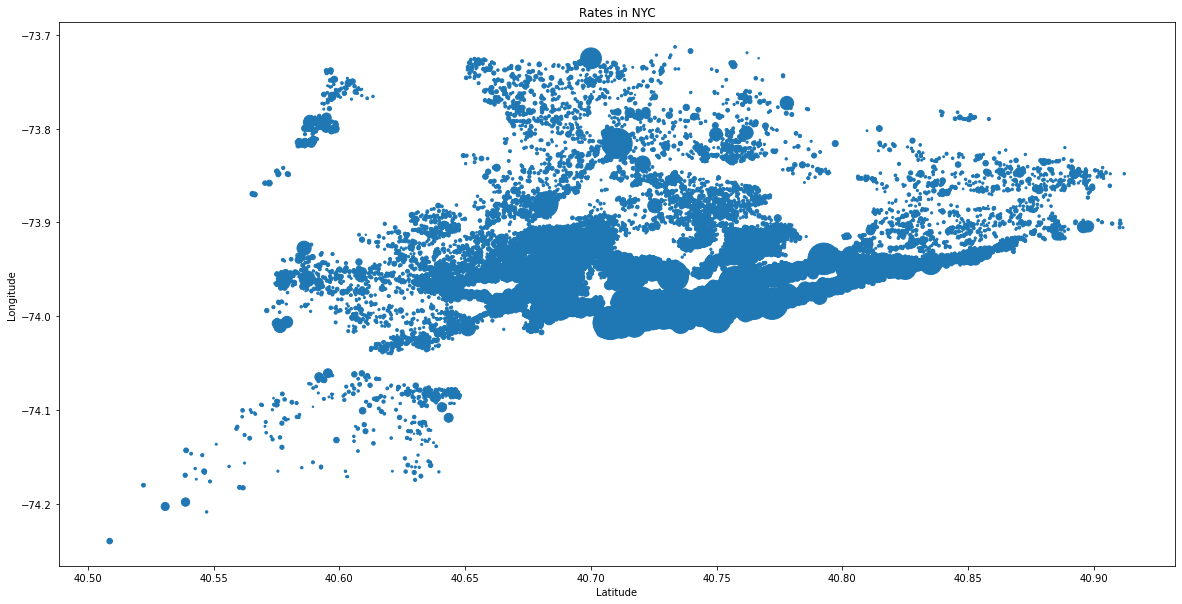

In [9]:
plt.figure(figsize= (20,10))
plt.scatter(x = df_price.latitude, y = df_price.longitude, s = df_price.price/10);
plt.title("Rates in NYC")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

## Using histogram to understand skewness of the data

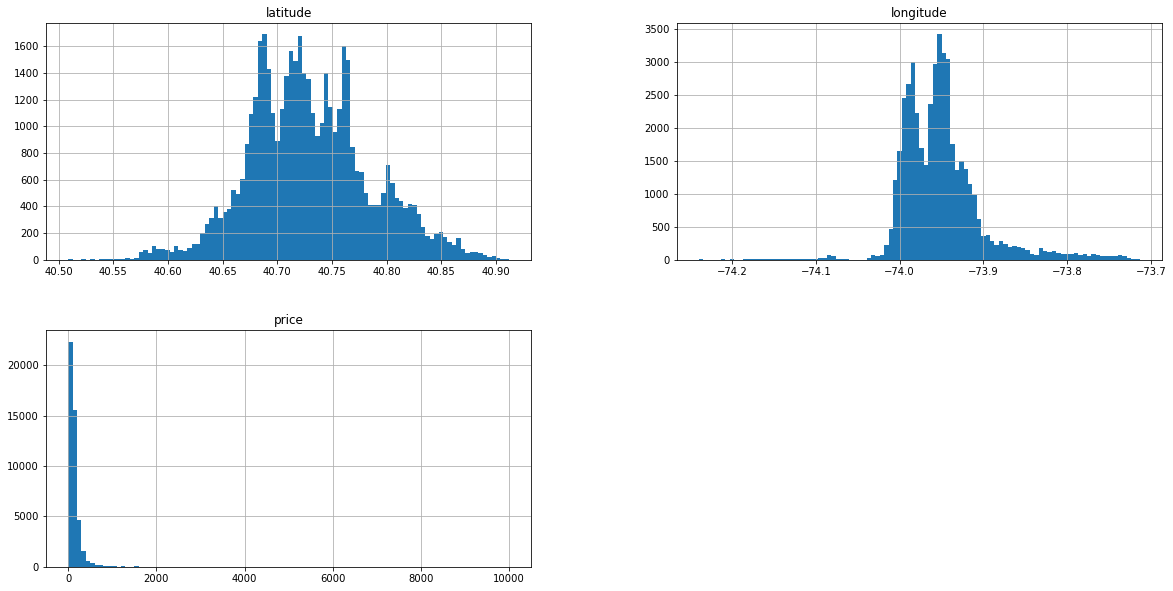

In [10]:
df_price.hist(bins =100, figsize = (20,10));

## Understang relation of latitude and longitute with price 

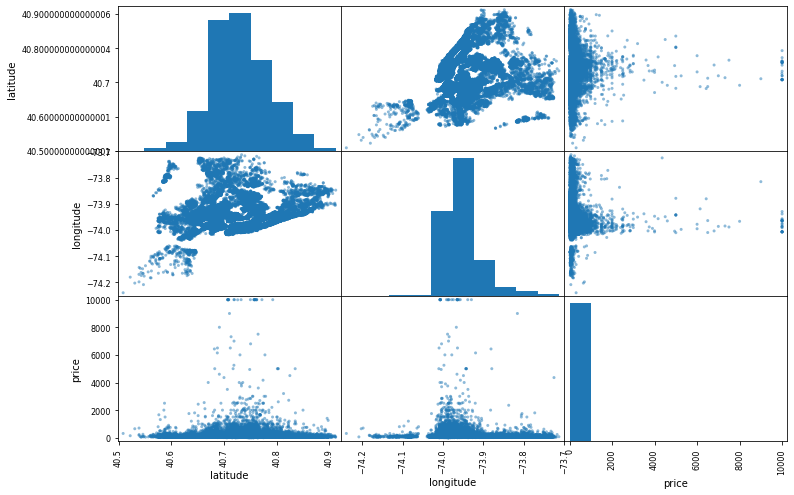

In [11]:
scatter_matrix(df_price, figsize = (12,8));

## Increase in price can be seen as we move towards 40 in latitude and 74 in Longitude.

## PLotting the heat map of correlation between latitude longitude and price.

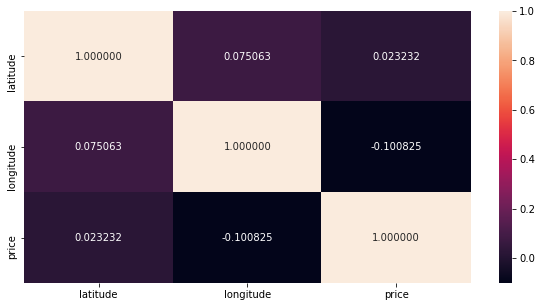

In [12]:
from seaborn import heatmap
plt.figure(figsize= (10,5) )
heatmap(df_price.corr(), annot=True, fmt="f" );

In [13]:
x = df_price.iloc[:,:2].values
y = df_price.iloc[:,2].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
len(x_train)

36604

# Using Random Forest Regressor.

In [14]:
from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor(n_estimators=100)
RandomForest.fit (x_train,y_train)

RandomForestRegressor()

In [15]:
y_pred = RandomForest.predict(x_train[-5:])
y_true = y_train[-5:]

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_true, y_pred))

55.34985257432941

# Using Support Vector Regressor

In [16]:
from sklearn.svm import SVR

svr = SVR(kernel= "linear")
svr.fit (x_train,y_train)

SVR(kernel='linear')

In [17]:
y_pred = svr.predict(x_train[-5:])
y_true = y_train[-5:]

from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_true, y_pred))

33.39450807578271

### In the above step it can be seen that the error for SVR is less as compared to the Random forest.

### Now let's see which of the model generalizes the data well.

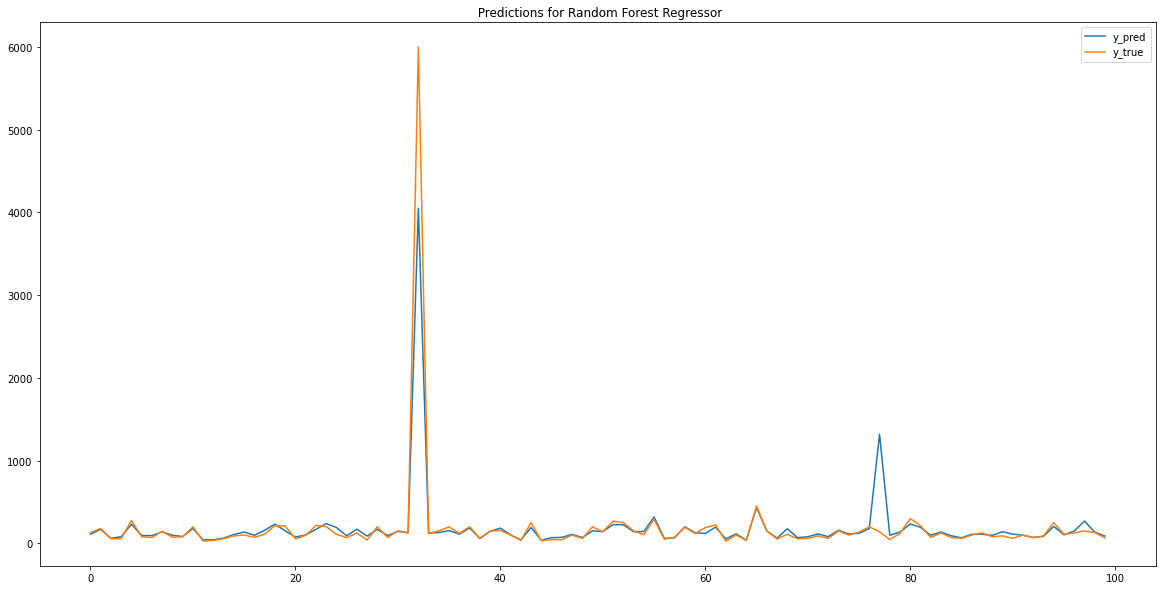

In [23]:
y_pred = RandomForest.predict(x_train[-100:])
y_true = y_train[-100:]

plt.figure(figsize= (20,10))
plt.plot(y_pred, label = "y_pred")
plt.plot(y_true, label = "y_true")
plt.title(" Predictions for Random Forest Regressor")
plt.legend();

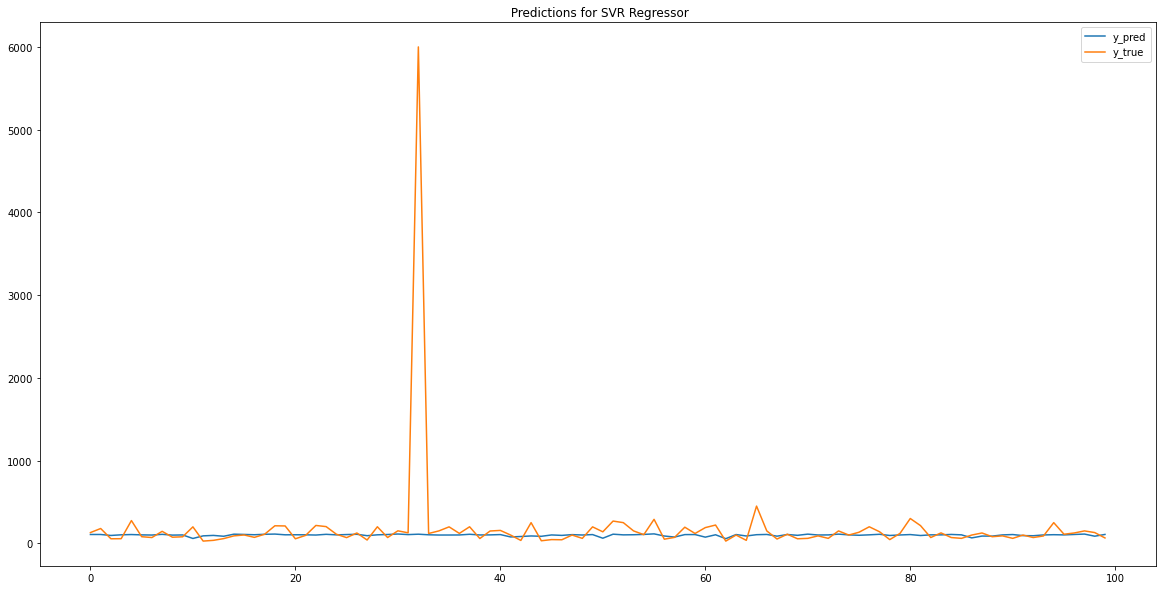

In [24]:
y_pred = svr.predict(x_train[-100:])
y_true = y_train[-100:]

plt.figure(figsize= (20,10))
plt.plot(y_pred, label = "y_pred")
plt.plot(y_true, label = "y_true")
plt.title(" Predictions for SVR Regressor")
plt.legend();

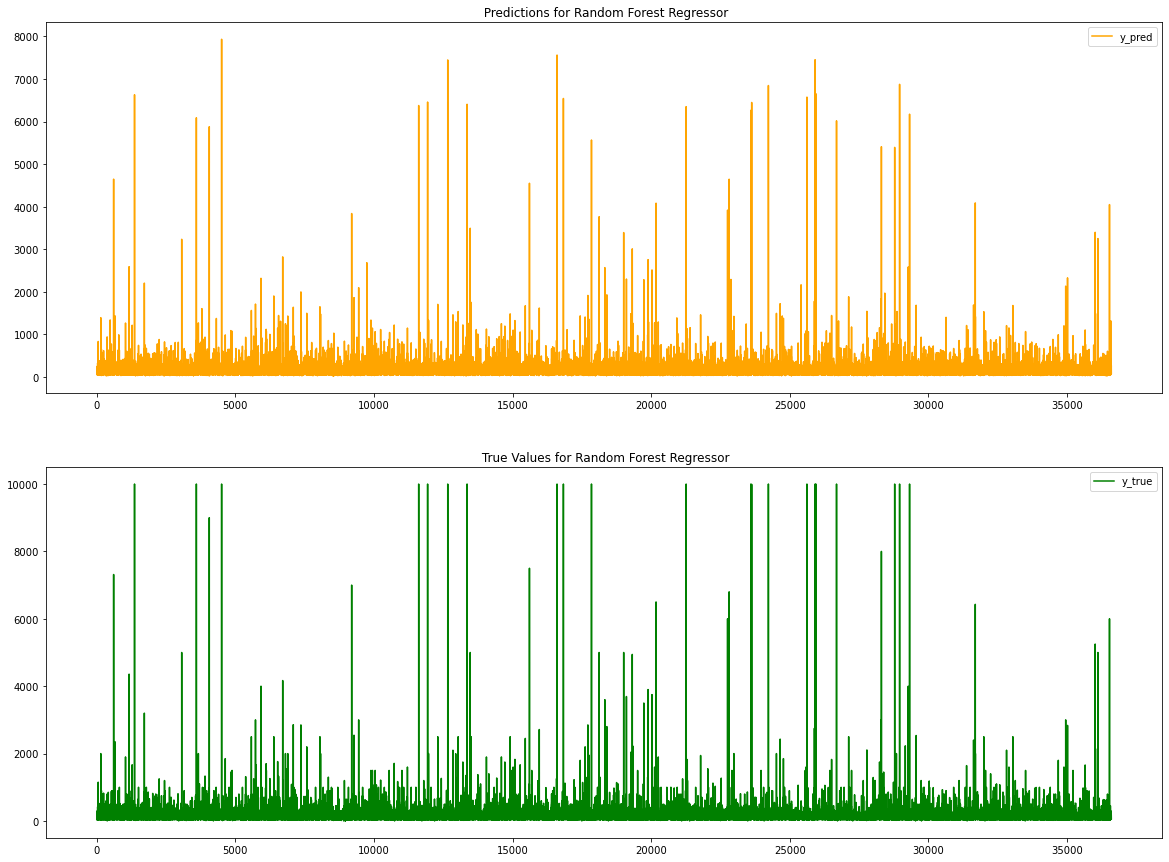

In [25]:
y_pred = RandomForest.predict(x_train)
y_true = y_train

plt.figure(figsize= (20,15))
plt.subplot(2,1,1)
plt.plot(y_pred, label = "y_pred", color = "orange")
plt.title(" Predictions for Random Forest Regressor")
plt.legend();
plt.subplot(2,1,2)
plt.plot(y_true, label = "y_true", color = "g")
plt.title(" True Values for Random Forest Regressor")
plt.legend();